In [335]:
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 16

g_label_fontsize = 16

colors = [
    "#999999",
    "#FF9999",
]

hatches = ["\\", "x", "+", "/"]

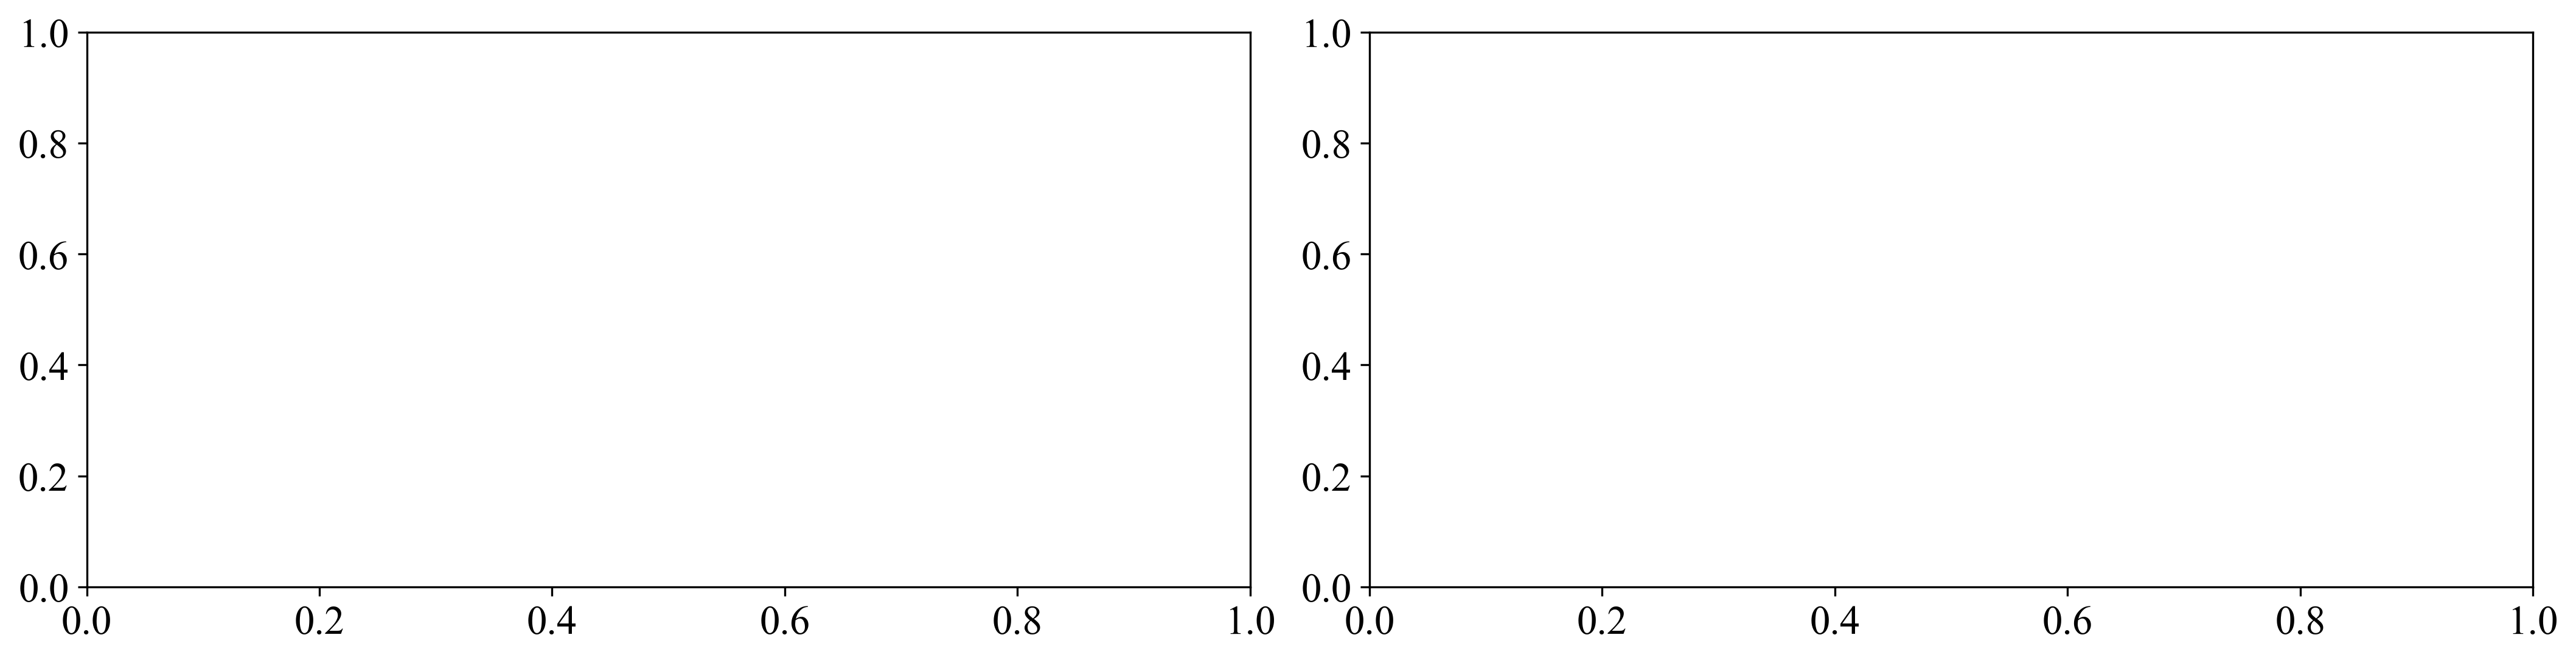

In [336]:
fig, ax = plt.subplots(
    figsize=(14, 14 / 4), ncols=2, nrows=1, constrained_layout=True, dpi=300
)

In [ ]:
data_a = {
    "7B#8GPUs": [53, 65], # 22.64
    "7B#16GPUs": [44,63], # 43
    "11B#8GPUs": [35, 48], # 37
    "11B#16GPUs": [22, 37] # 68
}

In [338]:
data_b = {
    "7B#8GPUs": [1.22, 1.01],
    "7B#16GPUs": [1.9, 1.62],
    "11B#8GPUs": [1.34, 1.1],
    "11B#16GPUs": [1.9, 1.436]
}

In [348]:
for key, values in data_b.items():
    print((values[0] - values[1]) / values[0])

0.17213114754098358
0.14736842105263148
0.1791044776119403
0.24421052631578946


In [339]:
legend_labels = ["FSDP", "DLRover-Lynx"]

In [340]:
bar_width = 0.2
group_spaing = 0.15

group_positions = {}
current_pos = 0

for x_label, y_data in data_a.items():
    group_positions[x_label] = []
    for i in range(len(y_data)):
        group_positions[x_label].append(current_pos)
        current_pos += bar_width
    current_pos += group_spaing

group_centers = {}
for x_label, positions in group_positions.items():
    group_centers[x_label] = sum(positions) / len(positions)

In [341]:
for x_label, y_data in data_a.items():
    positions = group_positions[x_label]
    for i, (pos, value, color, hatch) in enumerate(
        zip(
            positions,
            y_data,
            colors,
            hatches,
        )
    ):
        ax[0].bar(
            pos,
            value,
            width=bar_width,
            color=color,
            edgecolor="black",
            hatch=hatch,
        )

ax[0].set_xticks(list(group_centers.values()))
ax[0].set_xticklabels(list(data_a.keys()))

ax[0].set_ylim(0, 100)
ax[0].set_yticks([0, 50, 100])
ax[0].set_yticklabels(["0", "50", "100"], rotation=90, ha="center", va="center")

ax[0].tick_params(axis="x", bottom=False, labelsize=g_label_fontsize, pad=1)
ax[0].tick_params(axis="y", left=True, labelsize=g_label_fontsize, pad=5)

ax[0].set_ylabel("MFU (%)", fontsize=g_label_fontsize)
ax[0].set_title("(a)")

Text(0.5, 1.0, '(a)')

In [342]:
label_set = set()
for x_label, y_data in data_b.items():
    positions = group_positions[x_label]
    for i, (pos, value, color, hatch, label) in enumerate(
        zip(positions, y_data, colors, hatches, legend_labels)
    ):
        if label in label_set:
            local_label = None
        else:
            local_label = label
            label_set.add(label)
        ax[1].bar(
            pos,
            value,
            width=bar_width,
            color=color,
            edgecolor="black",
            hatch=hatch,
            alpha=0.9,
            label=local_label,
        )

ax[1].set_xticks(list(group_centers.values()))
ax[1].set_xticklabels(list(data_a.keys()))

ax[1].set_ylim(0, 2.5)
ax[1].set_yticks([0, 1, 2])
ax[1].set_yticklabels(["0", "1", "2"], rotation=90, ha="center", va="center")

ax[1].tick_params(axis="x", bottom=False, labelsize=g_label_fontsize, pad=1)
ax[1].tick_params(axis="y", left=True, labelsize=g_label_fontsize, pad=5)

ax[1].set_ylabel("ITERATION TIME (S)", fontsize=g_label_fontsize)
ax[1].set_title("(b)")

Text(0.5, 1.0, '(b)')

In [343]:
fig.legend(
    ncol=4,
    loc="upper center",
    frameon=True,
    shadow=False,
    bbox_to_anchor=(0.5, 1.10),
    fontsize=g_label_fontsize,
)

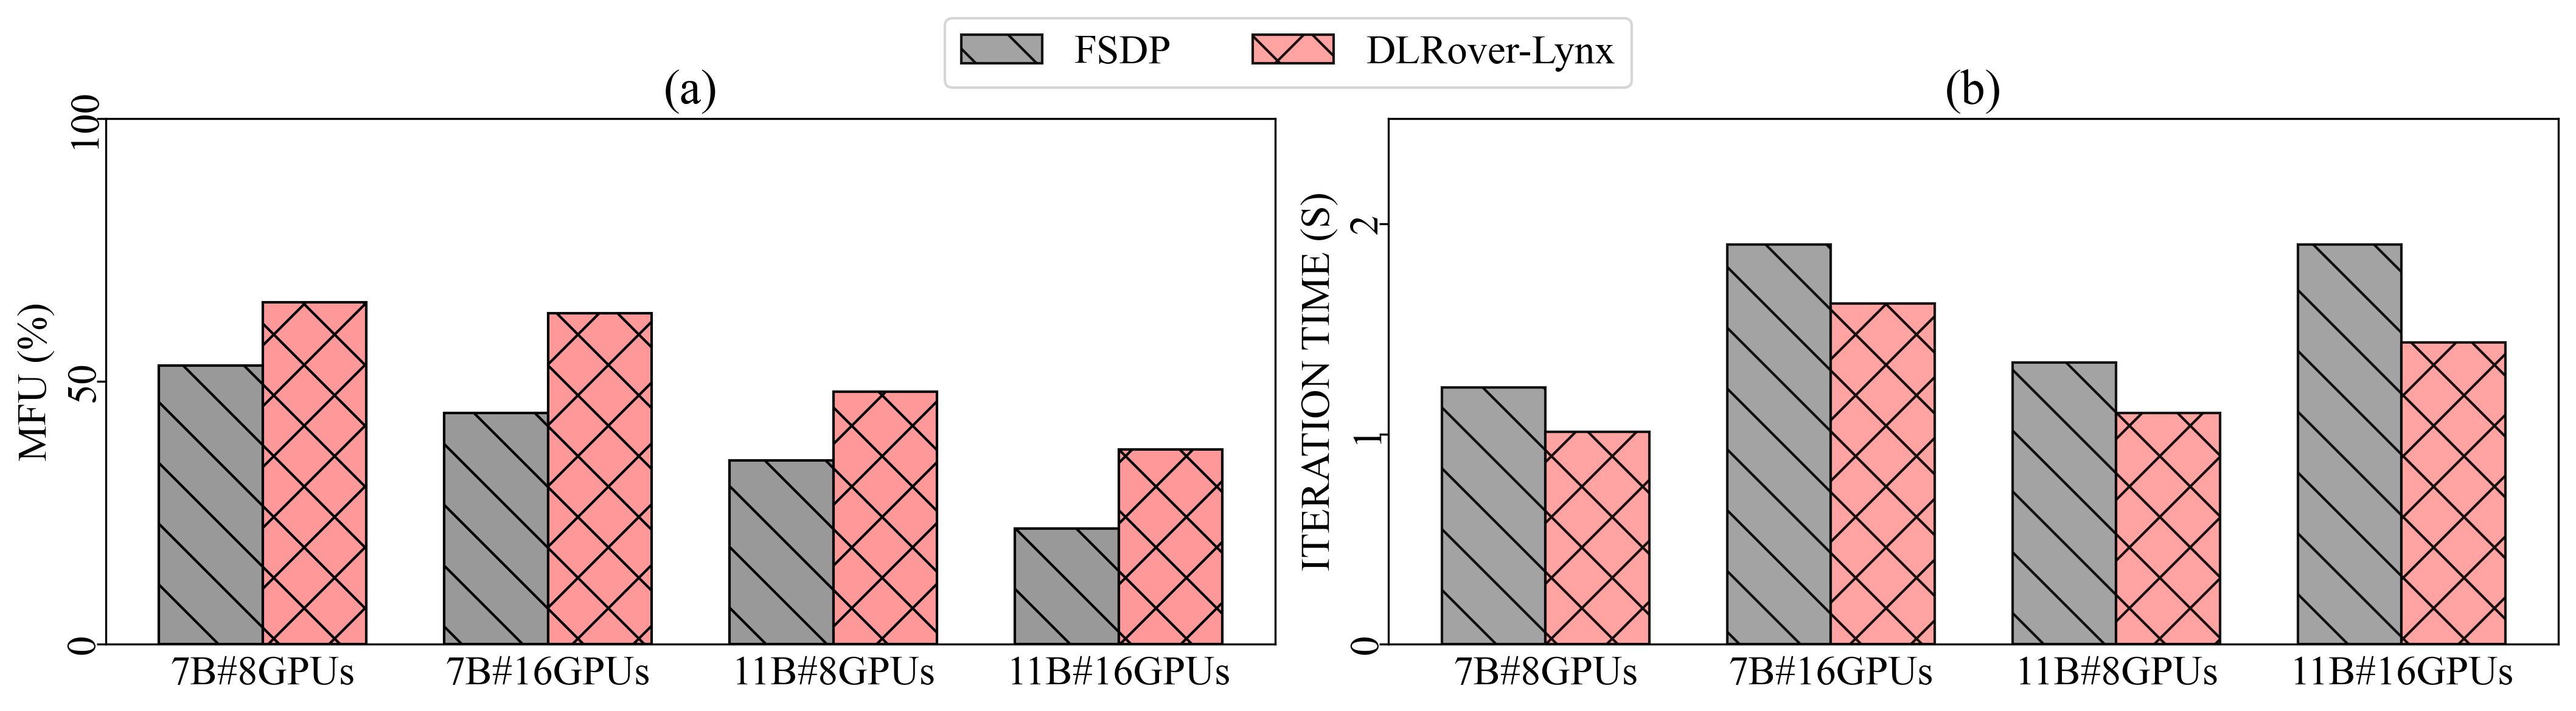

In [344]:
fig.savefig("lynx_end_to_end_nfsc.pdf", bbox_inches="tight", dpi=1000)
fig